In [2]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
import matplotlib.dates as mdates

In [3]:
dt=pd.read_csv('kag_risk_factors_cervical_cancer.csv')

In [14]:
pd.set_option('display.max_columns', None)


In [4]:
len(dt)

858

In [15]:
dt.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


In [13]:
dt.corr()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Age,1.000000,-0.001606,0.110340,0.061443,0.101722,0.092635,-0.003967,0.103283,-0.016862,0.055956
STDs: Number of diagnosis,-0.001606,1.000000,-0.015423,0.008070,-0.015423,-0.002289,0.076787,0.130873,0.055114,0.097449
Dx:Cancer,0.110340,-0.015423,1.000000,-0.015072,0.886508,0.665647,0.134264,0.157812,0.113446,0.160905
Dx:CIN,0.061443,0.008070,-0.015072,1.000000,-0.015072,0.606939,-0.021233,0.009119,-0.023938,0.113172
Dx:HPV,0.101722,-0.015423,0.886508,-0.015072,1.000000,0.616327,0.134264,0.157812,0.113446,0.160905
Dx,0.092635,-0.002289,0.665647,0.606939,0.616327,1.000000,0.072215,0.098952,0.088740,0.157607
Hinselmann,-0.003967,0.076787,0.134264,-0.021233,0.134264,0.072215,1.000000,0.650249,0.192467,0.547417
Schiller,0.103283,0.130873,0.157812,0.009119,0.157812,0.098952,0.650249,1.000000,0.361486,0.733204
Citology,-0.016862,0.055114,0.113446,-0.023938,0.113446,0.088740,0.192467,0.361486,1.000000,0.327466
Biopsy,0.055956,0.097449,0.160905,0.113172,0.160905,0.157607,0.547417,0.733204,0.327466,1.000000


In [7]:
def plot_corr(df_corr,title,title2):
    f , ax=plt.subplots(figsize=(14,10))
    sns.heatmap(df_corr,ax=ax,cmap='coolwarm',linewidths=0,square=True,annot=True)
    plt.title(title)
    plt.xlabel(title2)

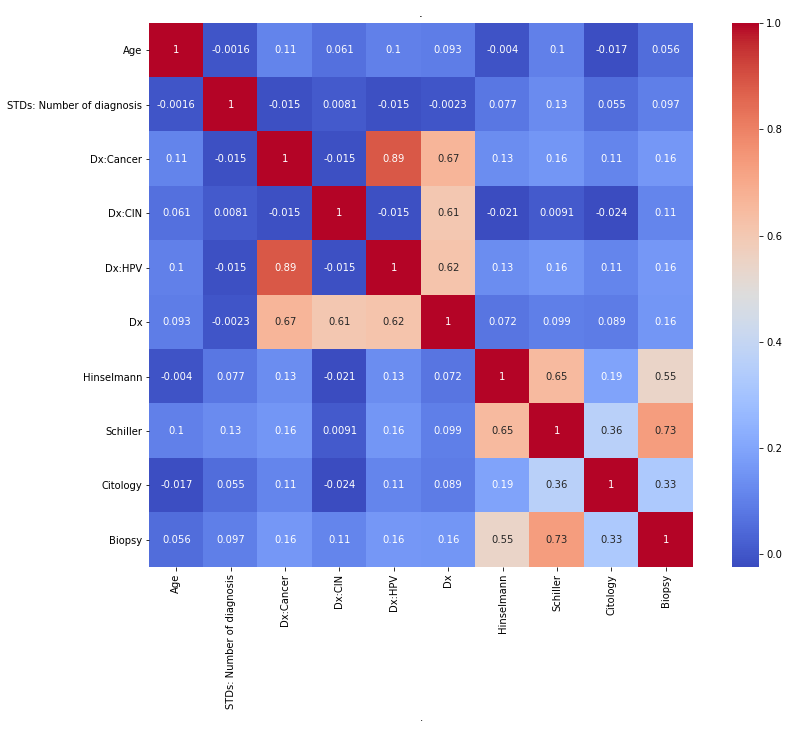

In [9]:
plot_corr(dt.corr(),'.','.')

In [11]:
cor=dt.corr().stack()

In [26]:
dt.munique(dt.nunique()<5)

Age                                   False
Number of sexual partners             False
First sexual intercourse              False
Num of pregnancies                    False
Smokes                                 True
Smokes (years)                        False
Smokes (packs/year)                   False
Hormonal Contraceptives                True
Hormonal Contraceptives (years)       False
IUD                                    True
IUD (years)                           False
STDs                                   True
STDs (number)                         False
STDs:condylomatosis                    True
STDs:cervical condylomatosis           True
STDs:vaginal condylomatosis            True
STDs:vulvo-perineal condylomatosis     True
STDs:syphilis                          True
STDs:pelvic inflammatory disease       True
STDs:genital herpes                    True
STDs:molluscum contagiosum             True
STDs:AIDS                              True
STDs:HIV                        

In [22]:
sorted(dt.nunique())

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 6,
 12,
 13,
 19,
 19,
 22,
 27,
 31,
 41,
 44,
 63]

In [12]:
cor.loc[cor<.98].loc[cor>0.3] #weighted_int~int =1 

Dx:Cancer   Dx:HPV        0.886508
            Dx            0.665647
Dx:CIN      Dx            0.606939
Dx:HPV      Dx:Cancer     0.886508
            Dx            0.616327
Dx          Dx:Cancer     0.665647
            Dx:CIN        0.606939
            Dx:HPV        0.616327
Hinselmann  Schiller      0.650249
            Biopsy        0.547417
Schiller    Hinselmann    0.650249
            Citology      0.361486
            Biopsy        0.733204
Citology    Schiller      0.361486
            Biopsy        0.327466
Biopsy      Hinselmann    0.547417
            Schiller      0.733204
            Citology      0.327466
dtype: float64